In [ ]:
!git clone https://github.com/yisikawa/PyTorch_TL_ResNet18.git

Cloning into 'PyTorch_TL_ResNet18'...
remote: Enumerating objects: 928, done.
remote: Counting objects: 100% (928/928), done.
remote: Compressing objects: 100% (926/926), done.
remote: Total 928 (delta 0), reused 928 (delta 0), pack-reused 0
Receiving objects: 100% (928/928), 43.04 MiB | 49.80 MiB/s, done.


In [ ]:
!ls -l PyTorch_TL_ResNet18

total 172
drwxr-xr-x 4 root root   4096 Apr 28 01:46 flower_data
-rw-r--r-- 1 root root     25 Apr 28 01:46 README.md
-rw-r--r-- 1 root root 164076 Apr 28 01:46 TL_ResNet18.ipynb


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets,models,transforms
from torch.utils.data import DataLoader

In [ ]:
device = "cuda" if torch.cuda.is_available else "cpu"

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [ ]:
train_dataset = datasets.ImageFolder("./PyTorch_TL_ResNet18/flower_data/train",transform=transform)
test_dataset = datasets.ImageFolder("./PyTorch_TL_ResNet18/flower_data/val",transform=transform)
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)

In [ ]:
model = models.resnet18(pretrained=True)

In [ ]:
for param in model.parameters():
    param.requires_grad = False
model.fc = nn.Linear(512,5)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(),lr=0.001)
num_epochs = 15
losses = []
accs = []
for epochs in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs,labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output,labels)
        running_loss += loss.item()
        pred = torch.argmax(output,dim=1)
        running_acc  += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_loader)
    running_acc /= len(train_loader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epochs,running_loss,running_acc))


epoch: 0, loss: 1.3361732622851497, acc: 0.45516306161880493
epoch: 1, loss: 0.8429651726847109, acc: 0.7504528760910034
epoch: 2, loss: 0.6480118476826212, acc: 0.8129528760910034
epoch: 3, loss: 0.5637977965500044, acc: 0.8469202518463135
epoch: 4, loss: 0.5012239749016969, acc: 0.85597825050354
epoch: 5, loss: 0.4942712744940882, acc: 0.8659420013427734
epoch: 6, loss: 0.43187150488729065, acc: 0.8632246255874634
epoch: 7, loss: 0.4422306159268255, acc: 0.854619562625885
epoch: 8, loss: 0.3567539246185966, acc: 0.9080615639686584
epoch: 9, loss: 0.31814519931440766, acc: 0.936141312122345
epoch: 10, loss: 0.3003298063641009, acc: 0.9415761232376099
epoch: 11, loss: 0.31506296862726624, acc: 0.9112319350242615
epoch: 12, loss: 0.29319465030794556, acc: 0.92798912525177
epoch: 13, loss: 0.3254032640353493, acc: 0.8935688734054565
epoch: 14, loss: 0.29563626841358515, acc: 0.9057971239089966


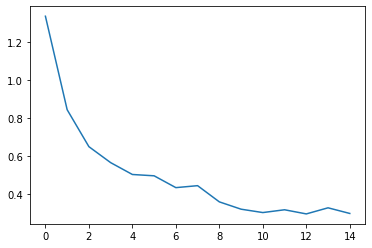

In [ ]:
plt.plot(losses)

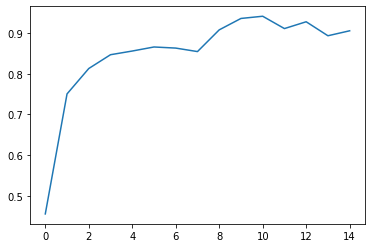

In [ ]:
plt.plot(accs)

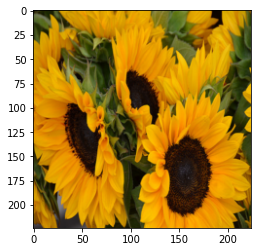

In [ ]:
test_iter = iter(test_loader)
testimgs,testlabels = test_iter.next()
testimg = testimgs[0]
testimg_permute = testimg.permute(1,2,0)
testimg_permute = 0.5*testimg_permute + 0.5
testimg_permute = np.clip(testimg_permute,0,1)
plt.imshow(testimg_permute)

In [ ]:
flower_name = ["daisy","dandelion","rose","sunflower","tulip"]
testimgs = testimgs.to(device)
testlabels = testlabels.to(device)
output = model(testimgs)
pred = torch.argmax(output,dim=1)
print("予測: {} >>> 正解: {}".format(flower_name[pred[0].item()],flower_name[testlabels[0].item()]))

予測: sunflower >>> 正解: sunflower
